# Homework 1: Insertion Sort, Merge Sort, Maximum Element Algorithms Run-Time
## Author: Adam Camerer
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

This notebook uses time, numpy, copy, and pyplot

In [107]:
# Install all the prerequisite packages from the Terminal
#!pip install numpy
#!pip install matplotlib

In [108]:
from time import time_ns #more precise timing
import numpy as np
import matplotlib.pyplot as plt
import copy

## Plotting Run-Time Complexity

### Functions

#### Merge Sort

In [109]:
#does merge sort on list, returns time for execution
def mergeSort(myList):
  start_time = time_ns() / (10 ** 9)
  if len(myList) > 1:
        mid = len(myList) // 2
        left = myList[:mid]
        right = myList[mid:]

        # Recursive call on each half
        mergeSort(left)
        mergeSort(right)

        # Two iterators for traversing the two halves
        i = 0
        j = 0
        
        # Iterator for the main list
        k = 0
        
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
              # The value from the left half has been used
              myList[k] = left[i]
              # Move the iterator forward
              i += 1
            else:
                myList[k] = right[j]
                j += 1
            # Move to the next slot
            k += 1

        # For all the remaining values
        while i < len(left):
            myList[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            myList[k]=right[j]
            j += 1
            k += 1
  finish_time = time_ns() / (10 ** 9)
  return finish_time-start_time

#### Max Element

In [110]:
def maxElement(array):
  start_time = time_ns() / (10 ** 9)
  maxElement = array[0]
  for i in range(len(array)):
    if(maxElement < array[i]):
      maxElement = array[i]
  finish_time = time_ns() / (10 ** 9)
  return finish_time-start_time

#### Insertion Sort

In [111]:
# Insertion sort without print statements
def insertionSort(array):
    start_time = time_ns() / (10 ** 9)
    # Loop from the second element of the array until
    # the last element
    for i in range(1, len(array)):
        # This is the element we want to position in its
        # correct place
        key_item = array[i]

        # Initialize the variable that will be used to
        # find the correct position of the element referenced
        # by `key_item`
        j = i - 1

        # Run through the list of items (the left
        # portion of the array) and find the correct position
        # of the element referenced by `key_item`. Do this only
        # if `key_item` is smaller than its adjacent values.
        while j >= 0 and array[j] > key_item:
            # Shift the value one position to the left
            # and reposition j to point to the next element
            # (from right to left)
            array[j + 1] = array[j]
            j -= 1

        # When you finish shifting the elements, you can position
        # `key_item` in its correct location
        array[j + 1] = key_item
    finish_time = time_ns() / (10 ** 9)
    return finish_time-start_time

### Function Execution

In [112]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [113]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
min_size_array = 10
max_size_array = 250
increments = 10

# Initiate average and worst case run-time
maxElem_avg_time_taken = [0]*(max_size_array//increments) #Max Element
maxElem_worst_time_taken = [0]*(max_size_array//increments)
insSort_avg_time_taken = [0]*(max_size_array//increments) #Insertion Sort
insSort_worst_time_taken = [0]*(max_size_array//increments)
merSort_avg_time_taken = [0]*(max_size_array//increments) #Merge Sort
merSort_worst_time_taken = [0]*(max_size_array//increments)


# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(min_size_array, max_size_array+1, increments): 
    maxElem_run_times = []
    insSort_run_times = []
    merSort_run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        maxElem_execution_time = maxElement(array) #Max Element runtime
        array_copy = copy.deepcopy(array)
        insSort_execution_time = insertionSort(array) #Insertion sort runtime
        merSort_execution_time = mergeSort(array_copy) #Merge sort runtime
        #print([maxElem_execution_time, insSort_execution_time, merSort_execution_time])
        
        insSort_run_times.append(insSort_execution_time)
        maxElem_run_times.append(maxElem_execution_time)
        merSort_run_times.append(merSort_execution_time)

    maxElem_avg_time_taken[count] = sum(maxElem_run_times)/len(maxElem_run_times) # Empirical average of run-time
    maxElem_worst_time_taken[count] = max(maxElem_run_times)              # Worst case run time across various random experiments    
    insSort_avg_time_taken[count] = sum(insSort_run_times)/len(insSort_run_times) # Empirical average of run-time
    insSort_worst_time_taken[count] = max(insSort_run_times)
    merSort_avg_time_taken[count] = sum(merSort_run_times)/len(merSort_run_times) # Empirical average of run-time
    merSort_worst_time_taken[count] = max(merSort_run_times)
    
    
    count += 1
#print(time_taken)

## Experiment Plotting

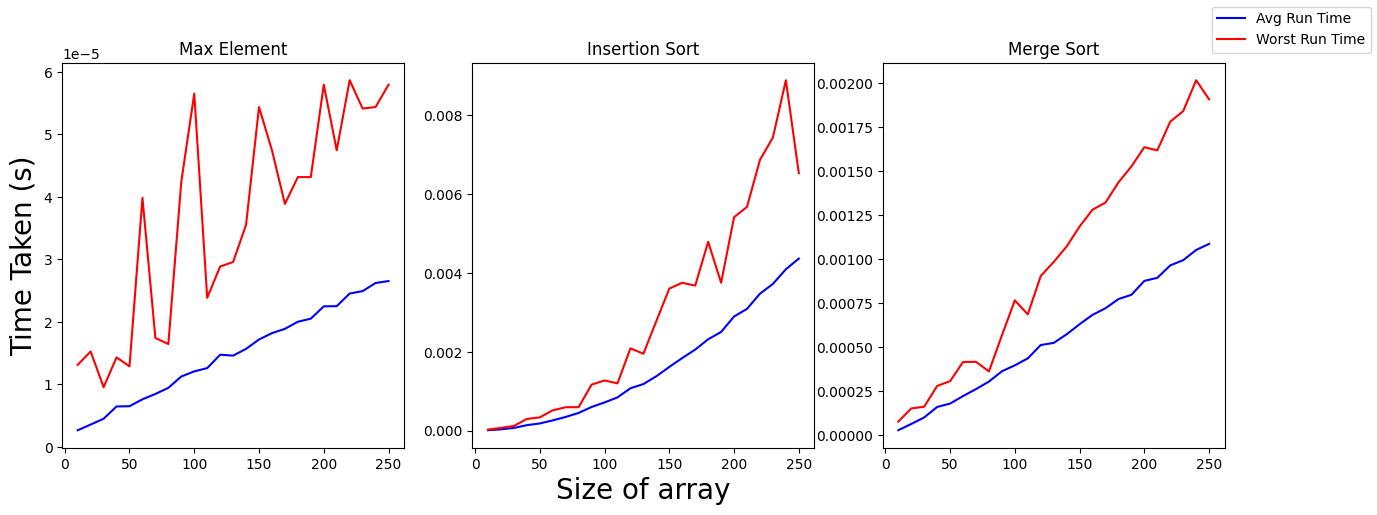

In [124]:
# Data Coordinates
x = np.arange(min_size_array, max_size_array+1, increments)
y = np.array(maxElem_avg_time_taken) #Max Element
z = np.array(maxElem_worst_time_taken)
a = np.array(insSort_avg_time_taken) #Insertion Sort
b = np.array(insSort_worst_time_taken)
c = np.array(merSort_avg_time_taken) #Merge Sort
d = np.array(merSort_worst_time_taken)

# Plot
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))
ax0.plot(x,y,'b',label='Avg Run Time') #Max Element
ax0.plot(x,z,'r',label='Worst Run Time')
ax1.plot(x,a,'b') #Insertion Sort
ax1.plot(x,b,'r')
ax2.plot(x,c,'b') #Merge Sort
ax2.plot(x,d,'r')

# Add Title
ax0.set_title("Max Element")
ax1.set_title("Insertion Sort")
ax2.set_title("Merge Sort")

# Add Axes Labels
#plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
#plt.xlabel("Size of Array")
#plt.ylabel("Time Taken")
#fig.xlabel("Size of Array") 
#fig.ylabel("Time Taken")
ax0.set_ylabel("Time Taken (s)", fontsize=20)
ax1.set_xlabel("Size of array", fontsize = 20)

# Display
fig.legend()
fig.show()